
   ## CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
            1. Airplanes
            2. Cars
            3. Birds
            4. Cats
            5. Deers
            6. Dogs
            7. Frogs
            8. Horses
            9. Ships
            10.Trucks
   # Dataset consists of 60,000 32x32 color images, ie 6000 images per class.
   ### Data Source: https://www.cs.toronto.edu/~kriz/cifar.html

In [46]:
# Loading the cifar10 dataset in keras
from matplotlib import pyplot
from keras.datasets import cifar10
# Load dataset
(Train_X, Train_y), (test_X, test_y) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


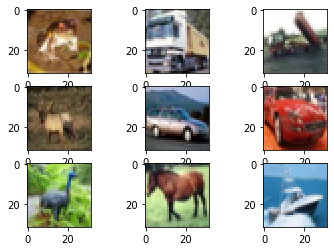

In [47]:
# summary of loaded dataset
print('Train: X=%s, y=%s' % (Train_X.shape, Train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))
# plot first 10 images from CIFAR10 dataset
for i in range(9):
	# defining subplot
	pyplot.subplot(330 + 1 + i)
	# ploting raw pixel data
	pyplot.imshow(Train_X[i])
# showing the figure as above
pyplot.show()

## Loading the downloaded data

In [48]:
(Train_X, Train_y), (test_X, test_Y) = cifar10.load_data()

In [49]:
print(Train_X.shape)
print(test_X.shape)
print(Train_y.shape)
print(test_Y.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


## Converting integer to floats

In [50]:
Train_X = Train_X.astype('float32')
test_X = test_X.astype('float32')

## One Hot encoding to target variables

In [51]:
import keras
Train_y_cat = keras.utils.to_categorical(Train_y)
test_Y_cat = keras.utils.to_categorical(test_Y)

In [52]:
# normalize to range 0-1
Train_X_norm = Train_X / 255.0
test_X_norm= test_X / 255.0

## Mean shifting and variance centering

In [53]:
import numpy as np
mean = np.mean(Train_X_norm, axis = (0,1,2,3))
std = np.std(Train_X_norm, axis = (0,1,2,3))

In [54]:
Train_X = (Train_X_norm-mean)/(std + 1e-7)
test_X = (test_X_norm-mean)/(std + 1e-7)

## Converting target variable into categorical matrix

In [55]:
y_train_cat = keras.utils.to_categorical(Train_y,10)
y_test_cat = keras.utils.to_categorical(test_Y,10)

In [56]:
input_shape = Train_X.shape[1:]
input_shape

(32, 32, 3)

## Model Building In Keras

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers

In [58]:
weight_decay = 1e-4

In [59]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [60]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)       

## Model Compilation

In [61]:
model.compile(loss = 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001, decay = 1e-6), metrics=['accuracy'])

## Model Training 

In [62]:
acc = model.fit(Train_X_norm, y_train_cat, batch_size=64, epochs=20, validation_split=0.2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 232s 6ms/step - loss: 1.8477 - accuracy: 0.4521 - val_loss: 1.5738 - val_accuracy: 0.5422
Epoch 2/20
40000/40000 [==============================] - 206s 5ms/step - loss: 1.1717 - accuracy: 0.6330 - val_loss: 0.9775 - val_accuracy: 0.6873
Epoch 3/20
40000/40000 [==============================] - 202s 5ms/step - loss: 0.9756 - accuracy: 0.6952 - val_loss: 0.9036 - val_accuracy: 0.7123
Epoch 4/20
40000/40000 [==============================] - 202s 5ms/step - loss: 0.8676 - accuracy: 0.7299 - val_loss: 0.8112 - val_accuracy: 0.7463
Epoch 5/20
40000/40000 [==============================] - 202s 5ms/step - loss: 0.7923 - accuracy: 0.7576 - val_loss: 0.7905 - val_accuracy: 0.7650
Epoch 6/20
40000/40000 [==============================] - 201s 5ms/step - loss: 0.7346 - accuracy: 0.7795 - val_loss: 0.7648 - val_accuracy: 0.7742
Epoch 7/20
40000/40000 [==============================] - 206s

## Plotting Accuracy &  Model Loss

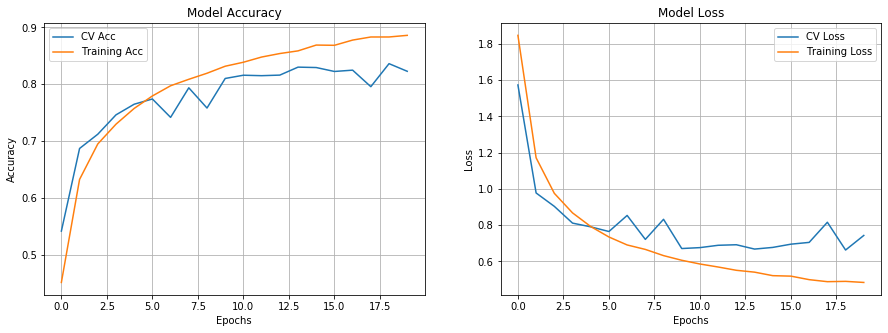

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(acc.history['val_accuracy'], label = 'CV Acc')
plt.plot(acc.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(acc.history['val_loss'], label = 'CV Loss')
plt.plot(acc.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

## Model Evaluation

In [64]:
Acc_score = model.evaluate(test_X, test_Y_cat, batch_size=32)

10000/10000 [==============================] - 13s 1ms/step


In [66]:
print("Accuracy on Test Set : {:.2f}%".format(Acc_score[1]*100))

Accuracy on Test Set : 64.16%
